In [3]:
%load_ext autoreload

In [1]:
from transformers import YolosFeatureExtractor, YolosForObjectDetection
from PIL import Image
import requests
from utils import *

url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

feature_extractor = YolosFeatureExtractor.from_pretrained('hustvl/yolos-small')
model = YolosForObjectDetection.from_pretrained('hustvl/yolos-small')

In [7]:
# How to save a model

#model = YolosForObjectDetection.save_pretrained('test_model')
#model2 = YolosForObjectDetection.from_pretrained('testmodel')

/usr/local/lib/python3.9/site-packages/transformers/models/yolos/feature_extraction_yolos.py:676: FutureWarning: `post_process` is deprecated and will be removed in v5 of Transformers, please use `post_process_object_detection`
  warnings.warn(


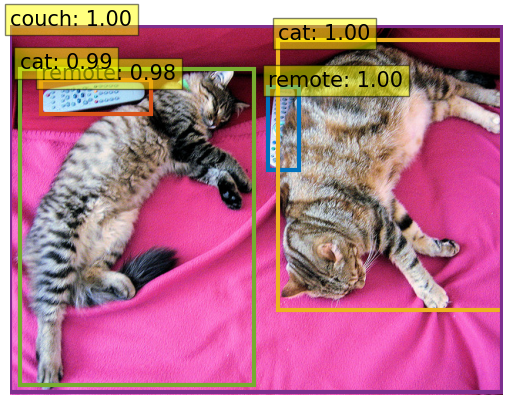

In [8]:
from transformers import pipeline
object_detector = pipeline('object-detection', model=model ,feature_extractor=feature_extractor)
results = object_detector(image)
plot_results(image, results)

## Creating metadata and dataloader

In [4]:
%autoreload
path_labels = "../datasets/Norway/train/annotations/xmls/"
path_imgs = "../datasets/Norway/train/images/"

create_metadata(path_imgs, path_labels)

Wrote metadata.jsonl to ../datasets/Norway/train/images/


In [5]:
from datasets import load_dataset

dataset = load_dataset(path_imgs)

Resolving data files:   0%|          | 0/2915 [00:00<?, ?it/s]

Using custom data configuration images-a0a70d87177ce702


Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to /Users/vnilsen/.cache/huggingface/datasets/imagefolder/images-a0a70d87177ce702/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
print(dataset['train'][0])

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3650x2044 at 0x13CCD7BB0>, 'objects': {'bbox': [[1138.46, 1281.93, 1169.35, 1336.85], [1537.53, 1131.79, 1629.06, 1247.64], [1773.45, 1825.97, 1862.69, 2038.78], [1589.02, 1296.26, 1624.77, 1343.46], [1507.53, 1216.53, 1527.49, 1254.27]], 'categories': [0, 3, 0, 0, 0]}}


In [12]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="/models",
    per_device_train_batch_size=8,
    num_train_epochs=10,
    #fp16=False,
    save_steps=200,
    logging_steps=50,
    learning_rate=1e-4,
    save_total_limit=2,
    remove_unused_columns=False,
    #push_to_hub=True,
    #hub_model_id="davanstrien/detr-resnet-50_fine_tuned_nls_chapbooks",
)

trainer = Trainer(
    model=model,
    args=training_args,
    #data_collator=collate_fn,
    train_dataset=dataset["train"],
    tokenizer=feature_extractor,
)
trainer.train()

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


AttributeError: module 'distutils' has no attribute 'version'